In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [67]:
# Generate some toy user and movie data

# Number of users
n_users = 100

# Number of movies
n_movies = 10

# Number of ratings
n_ratings = 1000

# Generate random user ids
user_ids = np.random.randint(0, n_users, n_ratings)

# Generate random movie ids
movie_ids = np.random.randint(0, n_movies, n_ratings)

# Generate random ratings
ratings = np.random.randint(1, 6, n_ratings)

# Create a dataframe with the data
df = pd.DataFrame({'user_id': user_ids, 'movie_id': movie_ids, 'rating': ratings})

# We should not have any duplicate ratings for the same user and movie
# Drop any rows that have duplicate user_id and movie_id pairs
df = df.drop_duplicates(['user_id', 'movie_id'])


In [68]:
df

,user_id,movie_id,rating
0,42,2,1
1,89,1,2
2,86,1,4
3,12,6,3
4,80,6,3
...,...,...,...
981,27,0,2
982,1,2,2
984,81,4,5
988,11,7,5


In [69]:
# Create a user-item matrix

A = df.pivot(index='user_id', columns='movie_id', values='rating')
A

movie_id,0,1,2,3,4,5,6,7,8,9
user_id,,,,,,,,,,
0,4.0,3.0,5.0,5.0,NaN,NaN,NaN,5.0,3.0,NaN
1,1.0,1.0,2.0,5.0,NaN,5.0,NaN,1.0,3.0,NaN
2,3.0,NaN,5.0,4.0,1.0,3.0,3.0,2.0,5.0,2.0
3,NaN,4.0,1.0,3.0,NaN,5.0,2.0,1.0,NaN,1.0
4,4.0,3.0,3.0,2.0,1.0,NaN,4.0,NaN,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...
95,3.0,NaN,1.0,NaN,1.0,3.0,3.0,3.0,4.0,4.0
96,1.0,2.0,NaN,NaN,3.0,NaN,2.0,3.0,NaN,2.0
97,NaN,NaN,NaN,3.0,NaN,3.0,1.0,NaN,3.0,NaN


In [70]:
# Fill in the missing values with zeros
A = A.fillna(0)

A

movie_id,0,1,2,3,4,5,6,7,8,9
user_id,,,,,,,,,,
0,4.0,3.0,5.0,5.0,0.0,0.0,0.0,5.0,3.0,0.0
1,1.0,1.0,2.0,5.0,0.0,5.0,0.0,1.0,3.0,0.0
2,3.0,0.0,5.0,4.0,1.0,3.0,3.0,2.0,5.0,2.0
3,0.0,4.0,1.0,3.0,0.0,5.0,2.0,1.0,0.0,1.0
4,4.0,3.0,3.0,2.0,1.0,0.0,4.0,0.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...
95,3.0,0.0,1.0,0.0,1.0,3.0,3.0,3.0,4.0,4.0
96,1.0,2.0,0.0,0.0,3.0,0.0,2.0,3.0,0.0,2.0
97,0.0,0.0,0.0,3.0,0.0,3.0,1.0,0.0,3.0,0.0


In [71]:
# Cosine similarity between U1 and U2

# User 1
u1 = A.loc[0]

# User 2
u2 = A.loc[1]

# Compute the dot product
dot = np.dot(u1, u2)

# Compute the L2 norm
norm_u1 = np.linalg.norm(u1)
norm_u2 = np.linalg.norm(u2)

# Compute the cosine similarity
cos_sim = dot / (norm_u1 * norm_u2)
cos_sim

0.6602414870635759

In [72]:
# Calculate the cosine similarity between users
from sklearn.metrics.pairwise import cosine_similarity

sim_matrix = cosine_similarity(A)

pd.DataFrame(sim_matrix)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,0.660241,0.777679,0.469409,0.699862,0.479770,0.755574,0.416966,0.545591,0.554525,...,0.583891,0.888070,0.424048,0.299175,0.603374,0.503721,0.430077,0.434429,0.461384,0.666361
1,0.660241,1.000000,0.792212,0.766282,0.507726,0.526331,0.537985,0.504328,0.414964,0.461888,...,0.250122,0.782586,0.194625,0.269131,0.480750,0.514929,0.132647,0.907222,0.272428,0.350325
2,0.777679,0.792212,1.000000,0.550823,0.816830,0.520153,0.812736,0.786007,0.598532,0.679392,...,0.540720,0.721315,0.156556,0.510296,0.723532,0.792913,0.391239,0.729769,0.515625,0.626224
3,0.469409,0.766282,0.550823,1.000000,0.468293,0.663451,0.395348,0.525726,0.338742,0.639021,...,0.420539,0.754386,0.544510,0.413714,0.350438,0.459105,0.404418,0.650814,0.569050,0.356026
4,0.699862,0.507726,0.816830,0.468293,1.000000,0.489525,0.967349,0.709197,0.438397,0.606478,...,0.733388,0.561951,0.447214,0.588968,0.742392,0.676123,0.486834,0.489979,0.721117,0.614919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.503721,0.514929,0.792913,0.459105,0.676123,0.335847,0.611577,0.826380,0.819761,0.589453,...,0.500921,0.538260,0.037796,0.690654,0.722806,1.000000,0.622541,0.542105,0.311211,0.774827
96,0.430077,0.132647,0.391239,0.404418,0.486834,0.394961,0.325482,0.459922,0.709876,0.731717,...,0.593057,0.475786,0.340777,0.729291,0.452563,0.622541,1.000000,0.067884,0.491035,0.823545
97,0.434429,0.907222,0.729769,0.650814,0.489979,0.277054,0.483494,0.532327,0.395437,0.303915,...,0.024001,0.525657,0.000000,0.236113,0.428571,0.542105,0.067884,1.000000,0.196827,0.298807
98,0.461384,0.272428,0.515625,0.569050,0.721117,0.620299,0.624518,0.500069,0.105939,0.739759,...,0.644826,0.465586,0.658710,0.365978,0.311643,0.311211,0.491035,0.196827,1.000000,0.391109


<AxesSubplot:>

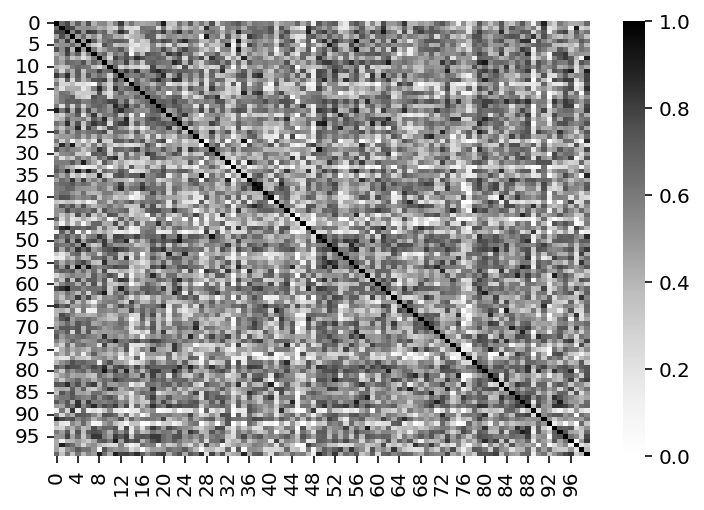

In [73]:
import seaborn as sns

sns.heatmap(sim_matrix, cmap='Greys')


In [74]:
# Find the most similar users to user u 

def k_nearest_neighbors(A, u, k):
    """Find the k nearest neighbors for user u"""
    # Find the index of the user in the matrix
    u_index = A.index.get_loc(u)
    
    # Compute the similarity between the user and all other users
    sim_matrix = cosine_similarity(A)

    # Find the k most similar users
    k_nearest = np.argsort(sim_matrix[u_index])[::-1][1:k+1]
    
    # Return the user ids
    return A.index[k_nearest]

In [75]:
k_nearest_neighbors(A, 0, 5)

Int64Index([20, 91, 65, 12, 2], dtype='int64', name='user_id')

In [76]:
# Show matrix of movie ratings for u and k nearest neighbors

def show_neighbors(A, u, k):
    """Show the movie ratings for user u and k nearest neighbors"""
    # Get the user ids of the k nearest neighbors
    neighbors = k_nearest_neighbors(A, u, k)
    
    # Get the movie ratings for user u and the k nearest neighbors
    df = A.loc[[u] + list(neighbors)]
    
    # Return the dataframe
    return df

In [77]:
show_neighbors(A, 0, 5)

movie_id,0,1,2,3,4,5,6,7,8,9
user_id,,,,,,,,,,
0,4.0,3.0,5.0,5.0,0.0,0.0,0.0,5.0,3.0,0.0
20,4.0,2.0,3.0,4.0,3.0,0.0,2.0,5.0,4.0,0.0
91,2.0,3.0,3.0,3.0,0.0,3.0,0.0,4.0,1.0,0.0
65,2.0,0.0,3.0,2.0,2.0,2.0,0.0,4.0,1.0,0.0
12,1.0,1.0,4.0,2.0,0.0,1.0,3.0,5.0,5.0,0.0
2,3.0,0.0,5.0,4.0,1.0,3.0,3.0,2.0,5.0,2.0


In [78]:
# Rating for user u for movie 0 is: (4.0 + 3.0) / 2 = 3.5 (Discard 0s)

def predict_rating(A, u, m, k=5):
    """Predict the rating for user u for movie m"""
    # Get the user ids of the k nearest neighbors
    neighbors = k_nearest_neighbors(A, u, k)
    
    # Get the movie ratings for user u and the k nearest neighbors
    df = A.loc[[u] + list(neighbors)]
    
    # Get the ratings for movie m
    ratings = df[m]
    
    # Calculate the mean of the ratings
    mean = ratings[1:][ratings != 0].mean()
    
    # Return the mean
    return mean

In [79]:
predict_rating(A, 0, 5)

2.25

In [80]:
# Now working with real data

# Load the data

df = pd.read_excel("mov-rec.xlsx")
df.head()

,Timestamp,Your name,Sholay,Swades (We The People),The Matrix (I),Interstellar,Dangal,Taare Zameen Par,Shawshank Redemption,The Dark Knight,Notting Hill,Uri: The Surgical Strike
0,2023-04-11 10:58:44.990,Nipun,4.0,5.0,4.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0
1,2023-04-11 10:59:49.617,Gautam Vashishtha,3.0,4.0,4.0,5.0,3.0,1.0,5.0,5.0,4.0,3.0
2,2023-04-11 11:12:44.033,Eshan Gujarathi,4.0,NaN,5.0,5.0,4.0,5.0,5.0,5.0,NaN,4.0
3,2023-04-11 11:13:48.674,Sai Krishna Avula,5.0,3.0,3.0,4.0,4.0,5.0,5.0,3.0,3.0,4.0
4,2023-04-11 11:13:55.658,Ankit Yadav,3.0,3.0,2.0,5.0,2.0,5.0,5.0,3.0,3.0,4.0


In [81]:
# Discard the timestamp column

df = df.drop('Timestamp', axis=1)

# Make the "Your Name" column the index

df = df.set_index('Your name')
df

,Sholay,Swades (We The People),The Matrix (I),Interstellar,Dangal,Taare Zameen Par,Shawshank Redemption,The Dark Knight,Notting Hill,Uri: The Surgical Strike
Your name,,,,,,,,,,
Nipun,4.0,5.0,4.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0
Gautam Vashishtha,3.0,4.0,4.0,5.0,3.0,1.0,5.0,5.0,4.0,3.0
Eshan Gujarathi,4.0,NaN,5.0,5.0,4.0,5.0,5.0,5.0,NaN,4.0
Sai Krishna Avula,5.0,3.0,3.0,4.0,4.0,5.0,5.0,3.0,3.0,4.0
Ankit Yadav,3.0,3.0,2.0,5.0,2.0,5.0,5.0,3.0,3.0,4.0
Dhruv,NaN,NaN,5.0,5.0,3.0,NaN,5.0,5.0,4.0,5.0
Saatvik Rao,4.0,3.0,4.0,5.0,2.0,2.0,4.0,5.0,3.0,5.0
Zeel B Patel,5.0,4.0,5.0,4.0,4.0,4.0,NaN,2.0,NaN,5.0
Neel,4.0,NaN,5.0,5.0,3.0,3.0,5.0,5.0,NaN,4.0


In [82]:
df.index

Index(['Nipun', 'Gautam Vashishtha', 'Eshan Gujarathi', 'Sai Krishna Avula',
       'Ankit Yadav ', 'Dhruv', 'Saatvik Rao ', 'Zeel B Patel', 'Neel ',
       'Sachin Jalan ', 'Ayush Shrivastava', '....', 'Hari Hara Sudhan',
       'Etikikota Hrushikesh', 'Chirag', 'Aaryan Darad', 'Hetvi Patel',
       'Kalash Kankaria', 'Rachit Verma', 'shriraj', 'Bhavini Korthi ',
       'Hitarth Gandhi ', 'Radhika Joglekar ', 'Medhansh Singh', 'Arun Mani',
       'Satyam ', 'Karan Kumar ', 'R Yeeshu Dhurandhar', 'Satyam Gupta',
       'rushali', 'shridhar', 'Tanvi Jain ', 'Manish Prabhubhai Salvi ',
       'Varun Barala', 'Kevin Shah ', 'Inderjeet', 'Gangaram Siddam ', 'Aditi',
       'Madhuri Awachar', 'Anupam', 'Jinay', 'Shrutimoy', 'Aadesh Desai',
       'Dhairya', 'Rahul C'],
      dtype='object', name='Your name')

In [83]:
# Get index for user and movie
user = 'Rahul C'

print(user in df.index)

# Get the movie ratings for user
user_ratings = df.loc[user]
user_ratings

True


Sholay                      3.0
Swades (We The People)      3.0
The Matrix (I)              4.0
Interstellar                4.0
Dangal                      4.0
Taare Zameen Par            4.0
Shawshank Redemption        4.0
The Dark Knight             5.0
Notting Hill                NaN
Uri: The Surgical Strike    NaN
Name: Rahul C, dtype: float64

In [84]:
df_copy = df.copy()
df_copy.fillna(0, inplace=True)
show_neighbors(df_copy, user, 5)


,Sholay,Swades (We The People),The Matrix (I),Interstellar,Dangal,Taare Zameen Par,Shawshank Redemption,The Dark Knight,Notting Hill,Uri: The Surgical Strike
Your name,,,,,,,,,,
Rahul C,3.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,0.0,0.0
Shrutimoy,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,0.0,2.0
Hitarth Gandhi,3.0,0.0,4.0,5.0,3.0,4.0,5.0,5.0,0.0,0.0
R Yeeshu Dhurandhar,5.0,0.0,4.0,5.0,4.0,4.0,5.0,5.0,0.0,0.0
shridhar,5.0,4.0,5.0,5.0,4.0,4.0,5.0,4.0,3.0,3.0
Sachin Jalan,4.0,0.0,5.0,5.0,3.0,4.0,4.0,5.0,0.0,3.0


In [85]:
df.describe()

,Sholay,Swades (We The People),The Matrix (I),Interstellar,Dangal,Taare Zameen Par,Shawshank Redemption,The Dark Knight,Notting Hill,Uri: The Surgical Strike
count,39.000000,32.000000,38.000000,43.000000,45.000000,44.000000,35.000000,40.000000,21.000000,39.000000
mean,4.102564,3.718750,4.131579,4.581395,3.644444,3.977273,4.400000,4.250000,3.476190,4.230769
std,0.753758,0.958304,0.991070,0.793802,1.003529,1.067242,0.976187,1.080123,0.813575,0.902089
min,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
25%,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000
50%,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,5.000000,3.000000,4.000000
75%,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [86]:
# Predict the rating for user u for movie m

predict_rating(df_copy, user, 'The Dark Knight')

4.8

In [87]:
predict_rating(df_copy, user, 'Sholay')

4.4

In [88]:
# Generic Matrix Factorization (without missing values)

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


# D is a matrix of size (n_users, n_movies) randomly generated values between 1 and 5
D = torch.randint(1, 6, (n_users, n_movies), dtype=torch.float)
D

tensor([[4., 4., 2., 5., 2., 3., 5., 5., 3., 2.],
        [5., 3., 5., 1., 2., 3., 5., 5., 2., 3.],
        [1., 3., 4., 3., 1., 2., 5., 1., 4., 3.],
        [3., 5., 1., 2., 2., 2., 4., 2., 1., 1.],
        [2., 5., 3., 1., 2., 5., 4., 2., 4., 5.],
        [3., 5., 1., 1., 3., 1., 5., 3., 3., 3.],
        [1., 2., 5., 1., 1., 4., 3., 4., 4., 5.],
        [2., 5., 1., 4., 3., 1., 5., 3., 3., 1.],
        [4., 3., 2., 2., 4., 5., 5., 5., 3., 3.],
        [1., 2., 5., 1., 2., 1., 3., 5., 3., 3.],
        [3., 2., 3., 3., 2., 1., 5., 3., 1., 5.],
        [5., 5., 5., 3., 5., 4., 4., 2., 4., 5.],
        [5., 2., 2., 1., 4., 3., 3., 5., 3., 3.],
        [4., 4., 5., 4., 1., 1., 1., 1., 3., 1.],
        [2., 5., 5., 2., 4., 5., 1., 1., 4., 4.],
        [3., 2., 1., 2., 1., 1., 2., 1., 2., 2.],
        [5., 5., 3., 3., 3., 3., 4., 1., 4., 3.],
        [5., 2., 4., 4., 2., 1., 4., 4., 5., 5.],
        [3., 3., 4., 2., 2., 3., 4., 1., 3., 4.],
        [3., 5., 3., 5., 5., 4., 1., 3., 1., 4.],


In [89]:
D.shape

torch.Size([100, 10])

Let us decompose D as AB. A is of shape (n, k) and B is of shape (k, n). We can write the above equation as:
D = AB 

In [90]:
# Randomly initialize A and B

A = torch.randn(n_users, 2, requires_grad=True)
B = torch.randn(n_movies, 2, requires_grad=True)

# Compute the loss

loss = torch.norm(torch.mm(A, B.t()) - D)
loss

tensor(120.8659, grad_fn=<LinalgVectorNormBackward0>)

In [91]:
pd.DataFrame(torch.mm(A, B.t()).detach().numpy())

,0,1,2,3,4,5,6,7,8,9
0,-1.264860,-1.512566,-2.037402,-1.262417,-0.132023,-1.027238,3.666524,2.496095,-0.179421,-0.089113
1,-1.775146,-1.131623,-0.252141,-1.085573,-0.387802,0.962701,0.262229,0.092588,1.281358,0.974351
2,1.072980,0.693813,0.178206,0.662960,0.232401,-0.558108,-0.206829,-0.089713,-0.759340,-0.578063
3,-2.261358,-1.489118,-0.446266,-1.415824,-0.484307,1.111051,0.568306,0.281543,1.558778,1.188488
4,-2.327101,-1.577842,-0.578746,-1.488436,-0.489104,1.033144,0.808672,0.446056,1.533820,1.172646
...,...,...,...,...,...,...,...,...,...,...
95,0.050433,-0.142864,-0.453207,-0.090314,0.046777,-0.451902,0.854854,0.599582,-0.307123,-0.221812
96,3.034490,1.814688,0.116038,1.772819,0.687387,-1.936142,0.141715,0.253754,-2.375615,-1.798406
97,5.616947,4.195326,2.414580,3.860471,1.101509,-1.555234,-3.858034,-2.407849,-3.103768,-2.401302
98,-1.941730,-1.688903,-1.462366,-1.499716,-0.332028,-0.041199,2.509351,1.653427,0.703850,0.565434


In [27]:
pd.DataFrame(D)

,0,1,2,3,4,5,6,7,8,9
0,1.0,4.0,3.0,5.0,2.0,5.0,3.0,4.0,1.0,3.0
1,5.0,2.0,4.0,4.0,1.0,3.0,2.0,3.0,4.0,3.0
2,1.0,1.0,4.0,4.0,1.0,2.0,4.0,2.0,2.0,3.0
3,4.0,3.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0,1.0
4,4.0,1.0,5.0,1.0,1.0,4.0,2.0,1.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...
95,1.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,2.0,4.0
96,3.0,2.0,3.0,4.0,3.0,3.0,5.0,2.0,3.0,2.0
97,1.0,3.0,2.0,3.0,5.0,3.0,5.0,1.0,2.0,3.0
98,4.0,3.0,2.0,1.0,2.0,3.0,3.0,1.0,4.0,2.0


In [28]:
# Optimizer

optimizer = optim.Adam([A, B], lr=0.01)

# Train the model

for i in range(1000):
    # Compute the loss
    loss = torch.norm(torch.mm(A, B.t()) - D)
    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Backpropagate
    loss.backward()
    
    # Update the parameters
    optimizer.step()
    
    # Print the loss
    if i % 10 == 0:
        print(loss.item())

115.35802459716797
111.52149200439453
108.49187469482422
106.08045959472656
103.93647766113281
101.58767700195312
98.55469512939453
94.49311828613281
89.3100814819336
83.21151733398438
76.62467956542969
70.03575134277344
63.89227294921875
58.51639175415039
54.00450897216797
50.31562805175781
47.390052795410156
45.16101837158203
43.53628158569336
42.39887619018555
41.624820709228516
41.10096740722656
40.736263275146484
40.46616744995117
40.25019073486328
40.065284729003906
39.89917755126953
39.74546432495117
39.60075759887695
39.463157653808594
39.331581115722656
39.20536422729492
39.08412170410156
38.96763610839844
38.855804443359375
38.748600006103516
38.64604568481445
38.548213958740234
38.45516586303711
38.36697769165039
38.28369903564453
38.20534896850586
38.131935119628906
38.06340789794922
37.99967956542969
37.940650939941406
37.88616180419922
37.8360481262207
37.790103912353516
37.748111724853516
37.70984649658203
37.6750602722168
37.64350128173828
37.61494827270508
37.589141845

In [29]:
pd.DataFrame(torch.mm(A, B.t()).detach().numpy()).head(2)

,0,1,2,3,4,5,6,7,8,9
0,2.760296,3.178874,2.978039,3.232967,2.928783,3.293471,3.438638,3.024349,3.257597,3.163118
1,4.100434,3.274340,3.823128,3.091235,2.616060,3.863670,1.691365,3.049109,3.051083,2.469662


In [30]:
pd.DataFrame(D).head(2)

,0,1,2,3,4,5,6,7,8,9
0,1.0,4.0,3.0,5.0,2.0,5.0,3.0,4.0,1.0,3.0
1,5.0,2.0,4.0,4.0,1.0,3.0,2.0,3.0,4.0,3.0


In [31]:
def factorize(D, k):
    """Factorize the matrix D into A and B"""
    # Randomly initialize A and B
    A = torch.randn(D.shape[0], k, requires_grad=True)
    B = torch.randn(D.shape[1], k, requires_grad=True)
    
    # Optimizer
    optimizer = optim.Adam([A, B], lr=0.01)
    
    # Train the model
    for i in range(1000):
        # Compute the loss
        loss = torch.norm(torch.mm(A, B.t()) - D)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Backpropagate
        loss.backward()
        
        # Update the parameters
        optimizer.step()
        
    return A, B, loss

In [32]:
for k in [1, 2, 3, 4, 5, 6, 9]:
    A, B, loss = factorize(D, k)
    print(k, loss.item())

1 41.327362060546875
2 37.35048294067383


KeyboardInterrupt: 

In [33]:
pd.DataFrame(torch.mm(A, B.t()).detach().numpy()).head(2)

,0,1,2,3,4,5,6,7,8,9
0,2.793340,3.182317,3.004699,3.226319,2.927514,3.308313,3.400554,3.022366,3.250936,3.144955
1,4.119824,3.272779,3.811543,3.107022,2.594617,3.870888,1.656050,3.066180,3.058107,2.471609


In [34]:
pd.DataFrame(D).head(2)

,0,1,2,3,4,5,6,7,8,9
0,1.0,4.0,3.0,5.0,2.0,5.0,3.0,4.0,1.0,3.0
1,5.0,2.0,4.0,4.0,1.0,3.0,2.0,3.0,4.0,3.0


In [97]:
# With missing values

# Randomly replace some entries with NaN

D = torch.randint(1, 6, (n_users, n_movies), dtype=torch.float)
D[torch.rand(D.shape) < 0.5] = float('nan')
D

tensor([[nan, nan, nan, 4., 4., 2., nan, 3., nan, 1.],
        [nan, nan, 3., nan, 2., nan, nan, 2., 4., 4.],
        [nan, 5., 5., nan, nan, nan, 1., 2., nan, nan],
        [5., 3., 5., nan, nan, nan, 4., 3., 4., nan],
        [nan, nan, 5., 3., 4., nan, nan, 3., 5., nan],
        [nan, 5., nan, 2., 1., 4., nan, 5., nan, nan],
        [nan, nan, nan, nan, 4., nan, nan, nan, nan, 4.],
        [4., 3., nan, nan, 3., nan, 1., nan, nan, 3.],
        [2., 4., 5., nan, 3., nan, 2., 2., nan, nan],
        [nan, 2., 1., nan, 2., nan, nan, nan, 3., 1.],
        [nan, nan, nan, nan, 1., 4., nan, 5., nan, 5.],
        [nan, nan, 4., 3., nan, nan, nan, nan, nan, 3.],
        [nan, 5., 2., 2., 4., nan, nan, 3., nan, nan],
        [5., nan, nan, 1., 4., 1., 3., nan, nan, nan],
        [nan, nan, nan, nan, 4., 5., nan, 1., 3., 1.],
        [1., nan, nan, 5., nan, nan, 4., 2., nan, nan],
        [4., nan, nan, nan, nan, nan, 1., nan, 4., nan],
        [1., nan, 4., nan, nan, nan, 5., nan, nan, 2.],
 

In [98]:
A, B, loss = factorize(D, 2)
loss

tensor(nan, grad_fn=<LinalgVectorNormBackward0>)

In [99]:
mask = ~torch.isnan(D)
mask

tensor([[False, False, False,  True,  True,  True, False,  True, False,  True],
        [False, False,  True, False,  True, False, False,  True,  True,  True],
        [False,  True,  True, False, False, False,  True,  True, False, False],
        [ True,  True,  True, False, False, False,  True,  True,  True, False],
        [False, False,  True,  True,  True, False, False,  True,  True, False],
        [False,  True, False,  True,  True,  True, False,  True, False, False],
        [False, False, False, False,  True, False, False, False, False,  True],
        [ True,  True, False, False,  True, False,  True, False, False,  True],
        [ True,  True,  True, False,  True, False,  True,  True, False, False],
        [False,  True,  True, False,  True, False, False, False,  True,  True],
        [False, False, False, False,  True,  True, False,  True, False,  True],
        [False, False,  True,  True, False, False, False, False, False,  True],
        [False,  True,  True,  True,  Tr

In [ ]:
mask.sum()

tensor(522)

In [ ]:
A = torch.randn(D.shape[0], k, requires_grad=True)
B = torch.randn(D.shape[1], k, requires_grad=True)

diff_matrix = torch.mm(A, B.t())-D
diff_matrix.shape

torch.Size([100, 10])

In [ ]:
# Mask the matrix
diff_matrix[mask].shape

torch.Size([522])

In [ ]:
# Modify the loss function to ignore NaN values

def factorize(D, k):
    """Factorize the matrix D into A and B"""
    # Randomly initialize A and B
    A = torch.randn(D.shape[0], k, requires_grad=True)
    B = torch.randn(D.shape[1], k, requires_grad=True)
    
    # Optimizer
    optimizer = optim.Adam([A, B], lr=0.01)
    
    # Train the model
    for i in range(1000):
        # Compute the loss
        diff_matrix = torch.mm(A, B.t())-D
        diff_vector = diff_matrix[mask]
        loss = torch.norm(diff_vector)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Backpropagate
        loss.backward()
        
        # Update the parameters
        optimizer.step()
        
    return A, B, loss

In [ ]:
A, B, loss = factorize(D, 5)
loss

tensor(8.3795, grad_fn=<LinalgVectorNormBackward0>)

In [ ]:
torch.mm(A, B.t())

tensor([[ 1.0002e+00, -6.1860e-01,  1.6844e+00,  9.9991e-01, -2.2450e+00,
         -4.0025e-01, -9.3873e-01,  4.5819e+00,  8.8804e-01,  2.8812e-01],
        [ 3.4045e+00,  4.3689e+00,  3.4459e+00,  7.1197e+00,  2.2094e+00,
          3.5827e+00,  6.9298e-01,  3.9435e+00,  3.7188e+00,  3.8646e+00],
        [ 1.8525e+00,  3.5934e+00,  2.3619e+00,  6.9679e+00,  2.2771e+00,
          3.0910e+00,  6.2187e-01,  7.6504e-01,  2.4307e+00,  4.5831e+00],
        [ 2.5042e+00,  2.7107e+00,  2.6498e+00,  1.0070e+00,  3.5360e+00,
          4.0030e+00,  2.0012e+00,  2.9972e+00,  2.6560e+00,  3.0001e+00],
        [-2.0035e+00, -7.5789e-01,  4.0035e+00, -2.6083e+00,  2.0150e+00,
         -3.2294e+00,  3.9778e+00,  1.5164e+00,  2.0601e+00,  1.9979e+00],
        [ 3.3313e+00,  5.0005e+00,  2.9979e+00,  1.9324e+00,  6.2719e+00,
          5.0010e+00,  3.4474e+00,  1.9747e+00,  3.9212e+00,  3.0002e+00],
        [ 2.4918e+00, -8.6924e-01,  2.9974e+00,  3.9993e+00, -3.6196e+00,
          3.3461e+00, -2.6180e+0

In [37]:
# Now use matrix factorization to predict the ratings

import torch
import torch.nn as nn
import torch.nn.functional as F

# Create a class for the model

class MatrixFactorization(nn.Module):
    def __init__(self, n_users, n_movies, n_factors=20):
        super().__init__()
        self.user_factors = nn.Embedding(n_users, n_factors)
        self.movie_factors = nn.Embedding(n_movies, n_factors)

    def forward(self, user, movie):
        return (self.user_factors(user) * self.movie_factors(movie)).sum(1)      

In [38]:
model = MatrixFactorization(n_users, n_movies, 2)
model

MatrixFactorization(
  (user_factors): Embedding(100, 2)
  (movie_factors): Embedding(10, 2)
)

In [41]:
model(torch.tensor([0]), torch.tensor([2]))

tensor([0.7200], grad_fn=<SumBackward1>)

In [61]:
D[0, 2]

tensor(4.)

In [93]:
type(D)

torch.Tensor

In [100]:
mask = ~torch.isnan(D)

# Get the indices of the non-NaN values
i, j = torch.where(mask)

# Get the values of the non-NaN values
v = D[mask]

# Store in PyTorch tensors
users = i.to(torch.int64)
movies = j.to(torch.int64)
ratings = v.to(torch.float32)

In [101]:
pd.DataFrame({'user': users, 'movie': movies, 'rating': ratings})

,user,movie,rating
0,0,3,4.0
1,0,4,4.0
2,0,5,2.0
3,0,7,3.0
4,0,9,1.0
...,...,...,...
475,99,3,5.0
476,99,4,4.0
477,99,5,1.0
478,99,6,5.0


In [109]:
# Fit the Matrix Factorization model
model = MatrixFactorization(n_users, n_movies, 4)
optimizer = optim.Adam(model.parameters(), lr=0.01)

for i in range(1000):
    # Compute the loss
    pred = model(users, movies)
    loss = F.mse_loss(pred, ratings)
    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Backpropagate
    loss.backward()
    
    # Update the parameters
    optimizer.step()
    
    # Print the loss
    if i % 100 == 0:
        print(loss.item())


14.76720142364502
5.302879810333252
1.1853851079940796
0.8891506195068359
0.7703914642333984
0.6836224794387817
0.6128221154212952
0.5464457869529724
0.4790089726448059
0.4133472144603729


In [110]:
model(users, movies)

tensor([3.5504, 4.5726, 2.0893, 2.4884, 1.2936, 2.9384, 2.1470, 2.1019, 3.5093,
        4.2946, 4.8612, 4.9779, 0.7723, 2.4426, 4.9019, 2.7154, 4.6238, 4.5157,
        3.9727, 3.1138, 4.8520, 4.0885, 3.1867, 3.5673, 4.2483, 4.7854, 1.5278,
        1.8672, 4.9511, 3.6045, 4.0314, 3.9938, 4.2236, 2.8767, 3.1728, 1.5280,
        2.2486, 1.5754, 4.0558, 4.6967, 2.4291, 2.3517, 2.8293, 1.9220, 0.9125,
        2.4512, 1.9802, 1.6365, 0.8372, 3.9049, 5.2756, 4.9593, 3.9328, 2.9037,
        3.1141, 5.3814, 2.1344, 2.6688, 3.4172, 2.3595, 5.3566, 2.2460, 2.8877,
        1.1667, 2.3674, 4.3707, 4.4671, 1.6232, 2.4872, 0.9337, 0.9816, 5.0356,
        3.9339, 2.0467, 4.0377, 0.9808, 3.9774, 0.9072, 4.0687, 3.5003, 3.4486,
        2.3463, 1.1872, 3.4819, 2.4824, 1.8702, 2.5937, 3.0414, 3.1106, 1.0834,
        0.7252, 4.9046, 1.6202, 2.4190, 1.8594, 3.1568, 1.8595, 2.2732, 2.4453,
        4.7729, 4.4842, 0.7743, 3.3701, 4.0804, 1.6852, 2.0471, 3.1755, 1.9141,
        5.1160, 2.9357, 3.9531, 0.9427, 

In [117]:
# Now, let's predict the ratings for our df dataframe

D = torch.from_numpy(df.values)
D.shape

torch.Size([45, 10])

In [118]:
mask = ~torch.isnan(D)

# Get the indices of the non-NaN values
i, j = torch.where(mask)

# Get the values of the non-NaN values
v = D[mask]

# Store in PyTorch tensors
users = i.to(torch.int64)
movies = j.to(torch.int64)
ratings = v.to(torch.float32)

In [119]:
pd.DataFrame({'user': users, 'movie': movies, 'rating': ratings})

,user,movie,rating
0,0,0,4.0
1,0,1,5.0
2,0,2,4.0
3,0,3,4.0
4,0,4,5.0
...,...,...,...
371,44,3,4.0
372,44,4,4.0
373,44,5,4.0
374,44,6,4.0


In [139]:
# Fit the Matrix Factorization model
n_users = D.shape[0]
n_movies = D.shape[1]
model = MatrixFactorization(n_users, n_movies, 4)
optimizer = optim.Adam(model.parameters(), lr=0.01)

for i in range(1000):
    # Compute the loss
    pred = model(users, movies)
    loss = F.mse_loss(pred, ratings)
    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Backpropagate
    loss.backward()
    
    # Update the parameters
    optimizer.step()
    
    # Print the loss
    if i % 100 == 0:
        print(loss.item())


21.0886173248291
4.061213493347168
0.7133367657661438
0.4743851125240326
0.38834860920906067
0.3376193344593048
0.3069866895675659
0.2862914800643921
0.27032995223999023
0.2577725350856781


In [140]:
# Now, let us predict the ratings for any user and movie from df for which we already have the ratings

username = 'Dhruv'
movie = 'The Dark Knight'

# Get the user and movie indices
user_idx = df.index.get_loc(username)
movie_idx = df.columns.get_loc(movie)

# Predict the rating
pred = model(torch.tensor([user_idx]), torch.tensor([movie_idx]))
pred.item(), df.loc[username, movie]

(5.302472114562988, 5.0)

In [141]:
df.loc[username]

Sholay                      NaN
Swades (We The People)      NaN
The Matrix (I)              5.0
Interstellar                5.0
Dangal                      3.0
Taare Zameen Par            NaN
Shawshank Redemption        5.0
The Dark Knight             5.0
Notting Hill                4.0
Uri: The Surgical Strike    5.0
Name: Dhruv, dtype: float64

In [142]:
# Now, let us predict the ratings for any user and movie from df for which we do not have the ratings

username = 'Dhruv'
movie = 'Sholay'

# Get the user and movie indices
user_idx = df.index.get_loc(username)
movie_idx = df.columns.get_loc(movie)

# Predict the rating
pred = model(torch.tensor([user_idx]), torch.tensor([movie_idx]))
pred, df.loc[username, movie]

(tensor([4.1941], grad_fn=<SumBackward1>), nan)

In [143]:
# Complete the matrix
with torch.no_grad():
    completed_matrix = pd.DataFrame(model.user_factors.weight @ model.movie_factors.weight.t(), index=df.index, columns=df.columns)
    # round to nearest integer
    completed_matrix = completed_matrix.round()


In [144]:
completed_matrix.head()

,Sholay,Swades (We The People),The Matrix (I),Interstellar,Dangal,Taare Zameen Par,Shawshank Redemption,The Dark Knight,Notting Hill,Uri: The Surgical Strike
Your name,,,,,,,,,,
Nipun,4.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0
Gautam Vashishtha,3.0,3.0,4.0,5.0,2.0,2.0,5.0,5.0,4.0,3.0
Eshan Gujarathi,4.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,4.0,5.0
Sai Krishna Avula,4.0,4.0,3.0,4.0,4.0,5.0,5.0,3.0,3.0,4.0
Ankit Yadav,4.0,3.0,3.0,4.0,3.0,4.0,5.0,3.0,3.0,3.0


In [145]:
df.head()

,Sholay,Swades (We The People),The Matrix (I),Interstellar,Dangal,Taare Zameen Par,Shawshank Redemption,The Dark Knight,Notting Hill,Uri: The Surgical Strike
Your name,,,,,,,,,,
Nipun,4.0,5.0,4.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0
Gautam Vashishtha,3.0,4.0,4.0,5.0,3.0,1.0,5.0,5.0,4.0,3.0
Eshan Gujarathi,4.0,NaN,5.0,5.0,4.0,5.0,5.0,5.0,NaN,4.0
Sai Krishna Avula,5.0,3.0,3.0,4.0,4.0,5.0,5.0,3.0,3.0,4.0
Ankit Yadav,3.0,3.0,2.0,5.0,2.0,5.0,5.0,3.0,3.0,4.0
